In [1]:
import numpy as np
import shapely
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
districts = gpd.read_file("data/geo_data/lab7/districts.geojson")
addresses = gpd.read_file("data/geo_data/lab7/addressregisterlviv31102025.csv")
mobility = gpd.read_file("data/geo_data/lab7/- (2).xlsx")

In [17]:
addresses["geometry"] = addresses.apply(lambda row: shapely.Point((row.x, row.y)), axis=1)
addresses = gpd.GeoDataFrame(addresses)

mobility["geometry"] = mobility.apply(lambda row: shapely.Point((row.lvivpoint_longitude, row.lvivpoint_latitude)), axis=1)
mobility = gpd.GeoDataFrame(mobility)

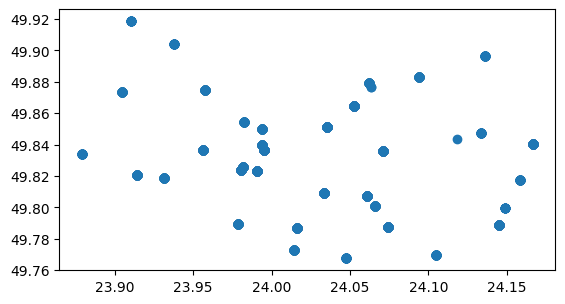

In [18]:
mobility.plot()
plt.show()

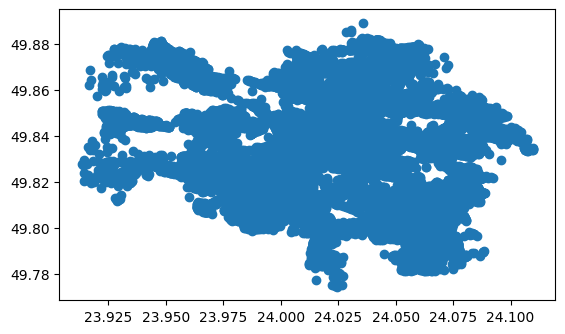

In [19]:
addresses.plot()
plt.show()

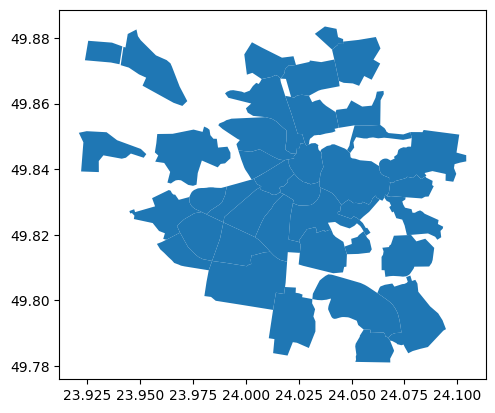

In [20]:
districts.plot()
plt.show()

In [21]:
botanic = gpd.read_file("data/geo_data/lab7/botanical_attractions_geojson_2025-11-04.geojson")
hist_build = gpd.read_file("data/geo_data/lab7/build_hist_lviv_geojson_2025-11-04.geojson")
kids_place = gpd.read_file("data/geo_data/lab7/kids_place_lviv_geojson_2025-11-04.geojson")

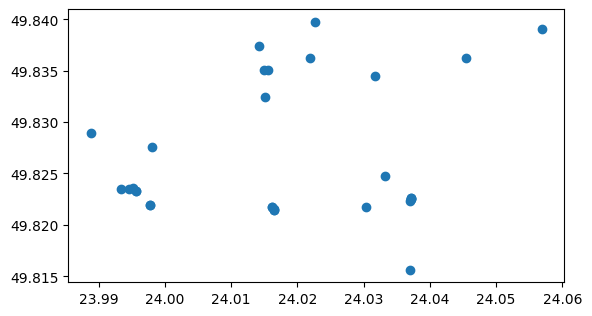

In [22]:
botanic.plot()
plt.show()

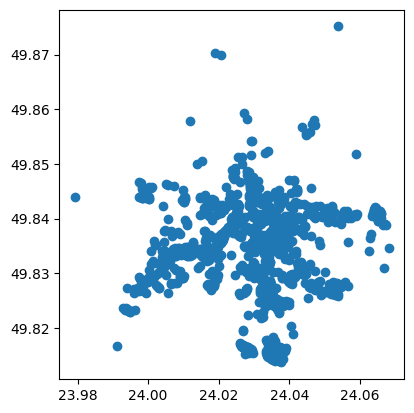

In [23]:
hist_build.plot()
plt.show()

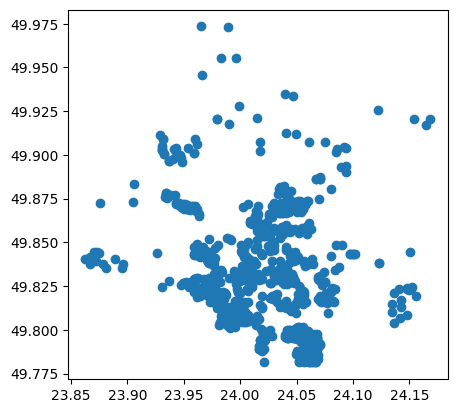

In [24]:
kids_place.plot()
plt.show()

In [25]:
poi = pd.concat([botanic[["geometry"]], hist_build[["geometry"]], kids_place[["geometry"]]])
poi_counts = districts.sjoin(poi, how="left").groupby("name").count()
poi_counts.sort_values(by="n", ascending=False).n

name
Личаків                          233
Центр                            206
Центр-Парк Культури              167
Стрийський парк-Зелена           132
Новий Львів                      130
Алтайські-Піскові озера          123
Святоюрська гора                 110
Сихів-Шувар-Іскра-Козельники      76
Володимира Великого-Наукова       59
Погулянка                         59
Санта-Барбара                     52
Левандівка                        44
Любінська-Південний               43
Студмістечко-Податкова            42
Сигнівка-Сріблястий               39
Клепарів                          39
Топольна-Замарстинів              38
700-річчя-Чорновола               37
Привокзальна-Цирк                 37
Кривчиці                          36
Замарстинів-Підзамче              32
Збоїща                            29
Рясне-1                           25
Автовокзал-Броньова               23
Привокзальна-Кульпарківська       22
Володимира Великого-Новий ЦУМ     18
Рогатка                          

In [26]:
poi = poi.to_crs(2157)
poi["geometry_poi"] = poi.geometry

addresses = addresses.set_crs(4326)
addresses = addresses.to_crs(2157)

In [27]:
closest_poi = addresses.sjoin_nearest(poi, rsuffix="poi")
closest_poi["distance"] = closest_poi.geometry.distance(closest_poi.geometry_poi)
closest_poi.head()

,address_id,house_id,post_index,vpz_ua,city_name,district_name,scode,street_type,street_d_name,street_s_name,...,change_doc_state,x,y,comment_location_address,codifier2021,KOATUU,geometry,index_poi,geometry_poi,distance
0,27732,692955f1-9a70-11ea-a29c-00155d153f03,79053,Львів 53,Львів,Франківський район,2283,вулиця,Янева В.,В. Янева,...,656,24.011755426893,49.8109059389152,null,UA46060250010015970,4610100000,POINT (2877553.142 849994.46),60,POINT (2877943.607 849811.359),431.263870
1,18487,d14758ca-453a-11e7-b7ff-00155d153f03,79054,Львів 54,Львів,Залізничний район,1841,вулиця,Петлюри С.,С. Петлюри,...,null,23.9781721635939,49.8206491998198,null,UA46060250010015970,4610100000,POINT (2874735.491 849926.934),709,POINT (2874823.056 849922.338),87.684875
2,18197,a738ff4f-453a-11e7-b0df-00155d153f03,79008,Львів 8,Львів,Галицький район,1935,площа,"Ринок, пл.",Ринок,...,null,24.0307004330168,49.84233160684,null,UA46060250010015970,4610100000,POINT (2877257.701 853975.84),1223,POINT (2877234.462 854048.214),76.013465
3,27226,ae9e14f3-453a-11e7-9b00-00155d153f03,79017,Львів 17,Львів,Личаківський район,2030,вулиця,Сліпого Й.,Й. Сліпого,...,null,24.0414789647864,49.8291963492835,null,UA46060250010015970,4610100000,POINT (2878672.982 852929.425),654,POINT (2878685.534 852945.084),20.068552
4,19526,902349ad-453a-11e7-abb4-00155d153f03,79052,Львів 52,Львів,Залізничний район,1162,вулиця,Вигоди,Вигоди,...,null,23.973358192514,49.8400430714806,null,UA46060250010015970,4610100000,POINT (2873414.491 851839.479),639,POINT (2873360.004 851805.917),63.993579


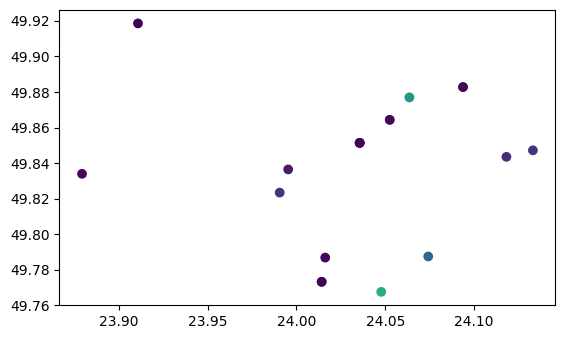

In [28]:
mobility.sort_values(by="amount", ascending=False).head(20).plot("amount")
plt.show()

In [29]:
mobility["geometry_start"] = mobility.apply(lambda row: shapely.Point((row.homecity_longitude, row.homecity_latitude)), axis=1)
mobility = mobility.set_crs(4326)
mobility = mobility.to_crs(2157)

mobility["geometry_start"] = mobility.geometry_start.set_crs(4326).to_crs(2157)

mobility["distance"] = mobility.geometry.distance(mobility.geometry_start)

In [31]:
mobility.sort_values(by="distance", ascending=False).head(20)

,ID_homecity,home_district,homecity,homecity_latitude,homecity_longitude,ID_lvivpoint,lvivpoint,lvivpoint_latitude,lvivpoint_longitude,lvivpoint_type,amount,geometry,geometry_start,distance
1347,1001,Мостиський,Арламівська Воля,49.829357,23.211522,18,вул. Тракт Глинянський,49.840239,24.166544,Автомобільний пункт,9,POINT (2886742.75 858249.864),POINT (2821256.994 825921.314),73030.947869
2493,1908,Яворівський,Колониці,50.073193,23.321203,9,Виїзд із с. Соснівка,49.789042,24.144683,Автомобільний пункт,8,POINT (2887858.372 852059.644),POINT (2816698.16 855531.095),71244.836664
133,107,Буський,Ожидів,49.957801,24.814208,12,вул. Городоцька,49.820843,23.914341,Автомобільний пункт,12,POINT (2870314.326 847845.212),POINT (2925218.225 892501.948),70771.902987
149,109,Буський,Топорів,50.106112,24.727651,12,вул. Городоцька,49.820843,23.914341,Автомобільний пункт,44,POINT (2870314.326 847845.212),POINT (2911500.893 905351.099),70733.729016
2174,1402,Радехівський,Павлів,50.263599,24.542141,14,вул. Кульпарківська,49.789182,23.978555,Автомобільний пункт,5,POINT (2876365.481 846578.462),POINT (2890593.944 915865.29),70732.691401
2175,1402,Радехівський,Павлів,50.263599,24.542141,16,вул. Стрийська,49.773122,24.014197,Автомобільний пункт,5,POINT (2879649.504 846039.503),POINT (2890593.944 915865.29),70678.294366
1575,1206,Перемишлянський,Чемеринці,49.669085,24.763173,26,Ст. Зимна Вода,49.833933,23.879268,Залізнична станція,9,POINT (2867225.204 848090.525),POINT (2936838.336 860023.465),70628.487027
1571,1206,Перемишлянський,Чемеринці,49.669085,24.763173,19,вул. Шевченка,49.873582,23.904715,Автомобільний пункт,9,POINT (2866967.422 853161.963),POINT (2936838.336 860023.465),70207.013829
2499,1908,Яворівський,Колониці,50.073193,23.321203,18,вул. Тракт Глинянський,49.840239,24.166544,Автомобільний пункт,8,POINT (2886742.75 858249.864),POINT (2816698.16 855531.095),70097.334507
2172,1402,Радехівський,Павлів,50.263599,24.542141,10,В'їзд у с. Зубра,49.767466,24.047725,Автомобільний пункт,5,POINT (2882257.611 846543.638),POINT (2890593.944 915865.29),69821.099476


In [33]:
mobility["distance"].mean()

np.float64(33893.4127231017)